In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
cancer_df = pd.read_csv('cervical_cancer.csv')

In [3]:
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
cancer_df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


# Data Imputation

In [7]:
cancer_df = cancer_df.replace('?', np.nan)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [8]:
cancer_df.notna().sum()

Age                                   858
Number of sexual partners             832
First sexual intercourse              851
Num of pregnancies                    802
Smokes                                845
Smokes (years)                        845
Smokes (packs/year)                   845
Hormonal Contraceptives               750
Hormonal Contraceptives (years)       750
IUD                                   741
IUD (years)                           741
STDs                                  753
STDs (number)                         753
STDs:condylomatosis                   753
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           753
STDs:vulvo-perineal condylomatosis    753
STDs:syphilis                         753
STDs:pelvic inflammatory disease      753
STDs:genital herpes                   753
STDs:molluscum contagiosum            753
STDs:AIDS                             753
STDs:HIV                              753
STDs:Hepatitis B                  

In [9]:
#since STDs: Time since first diagnosis & STDs: Time since last diagnosis has very less number
cancer_df = cancer_df.drop(columns = ['STDs: Time since first diagnosis' , 'STDs: Time since last diagnosis'])

In [10]:
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [11]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
columns_1=['Smokes (years)','STDs']
columns_0= ['IUD (years)', 'IUD']

for column in cancer_df:
    if column in columns_1:
        cancer_df[column] = cancer_df[column].fillna(1)
    elif column in columns_0:
        cancer_df[column] = cancer_df[column].fillna(0)
    else:
        cancer_df[column] = cancer_df[column].fillna(cancer_df[column].median())
    

In [13]:
print(cancer_df.isnull().sum(), cancer_df.notna().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [14]:
corr_mat = cancer_df.corr()
corr_mat

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.369175,0.525892,0.057204,0.217535,0.131861,0.029201,0.295267,0.279429,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.145847,0.077439,0.236858,0.177304,0.174968,0.004027,0.021188,0.032460,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.369175,-0.145847,1.000000,-0.056374,-0.123280,-0.058342,-0.056232,-0.009232,0.025071,-0.010758,...,0.034728,-0.013331,0.067281,-0.032628,0.043964,0.035748,-0.016549,0.003489,-0.010974,0.007259
Num of pregnancies,0.525892,0.077439,-0.056374,1.000000,0.081517,0.175054,0.096976,0.118938,0.218805,0.204501,...,-0.026153,0.034912,0.036962,-0.002600,0.048578,0.014227,0.037809,0.085810,-0.027675,0.040215
Smokes,0.057204,0.236858,-0.123280,0.081517,1.000000,0.722516,0.493843,0.004036,0.041979,-0.055115,...,0.049193,0.090725,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
Smokes (years),0.217535,0.177304,-0.058342,0.175054,0.722516,1.000000,0.724038,-0.014469,0.050995,0.028232,...,0.051054,0.081076,0.054352,-0.030881,0.056893,-0.049136,0.071081,0.094440,-0.006846,0.061440
Smokes (packs/year),0.131861,0.174968,-0.056232,0.096976,0.493843,0.724038,1.000000,0.001713,0.043262,0.008226,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives,0.029201,0.004027,-0.009232,0.118938,0.004036,-0.014469,0.001713,1.000000,0.385833,0.000188,...,0.032666,-0.062199,0.011278,-0.004397,0.028808,-0.007245,0.012360,-0.034002,-0.025116,-0.018015
Hormonal Contraceptives (years),0.295267,0.021188,0.025071,0.218805,0.041979,0.050995,0.043262,0.385833,1.000000,0.110677,...,0.053756,-0.028285,0.062971,0.003793,0.065640,-0.009136,0.051093,0.096702,0.082537,0.094164
IUD,0.279429,0.032460,-0.010758,0.204501,-0.055115,0.028232,0.008226,0.000188,0.110677,1.000000,...,-0.015819,0.035791,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,0.059231


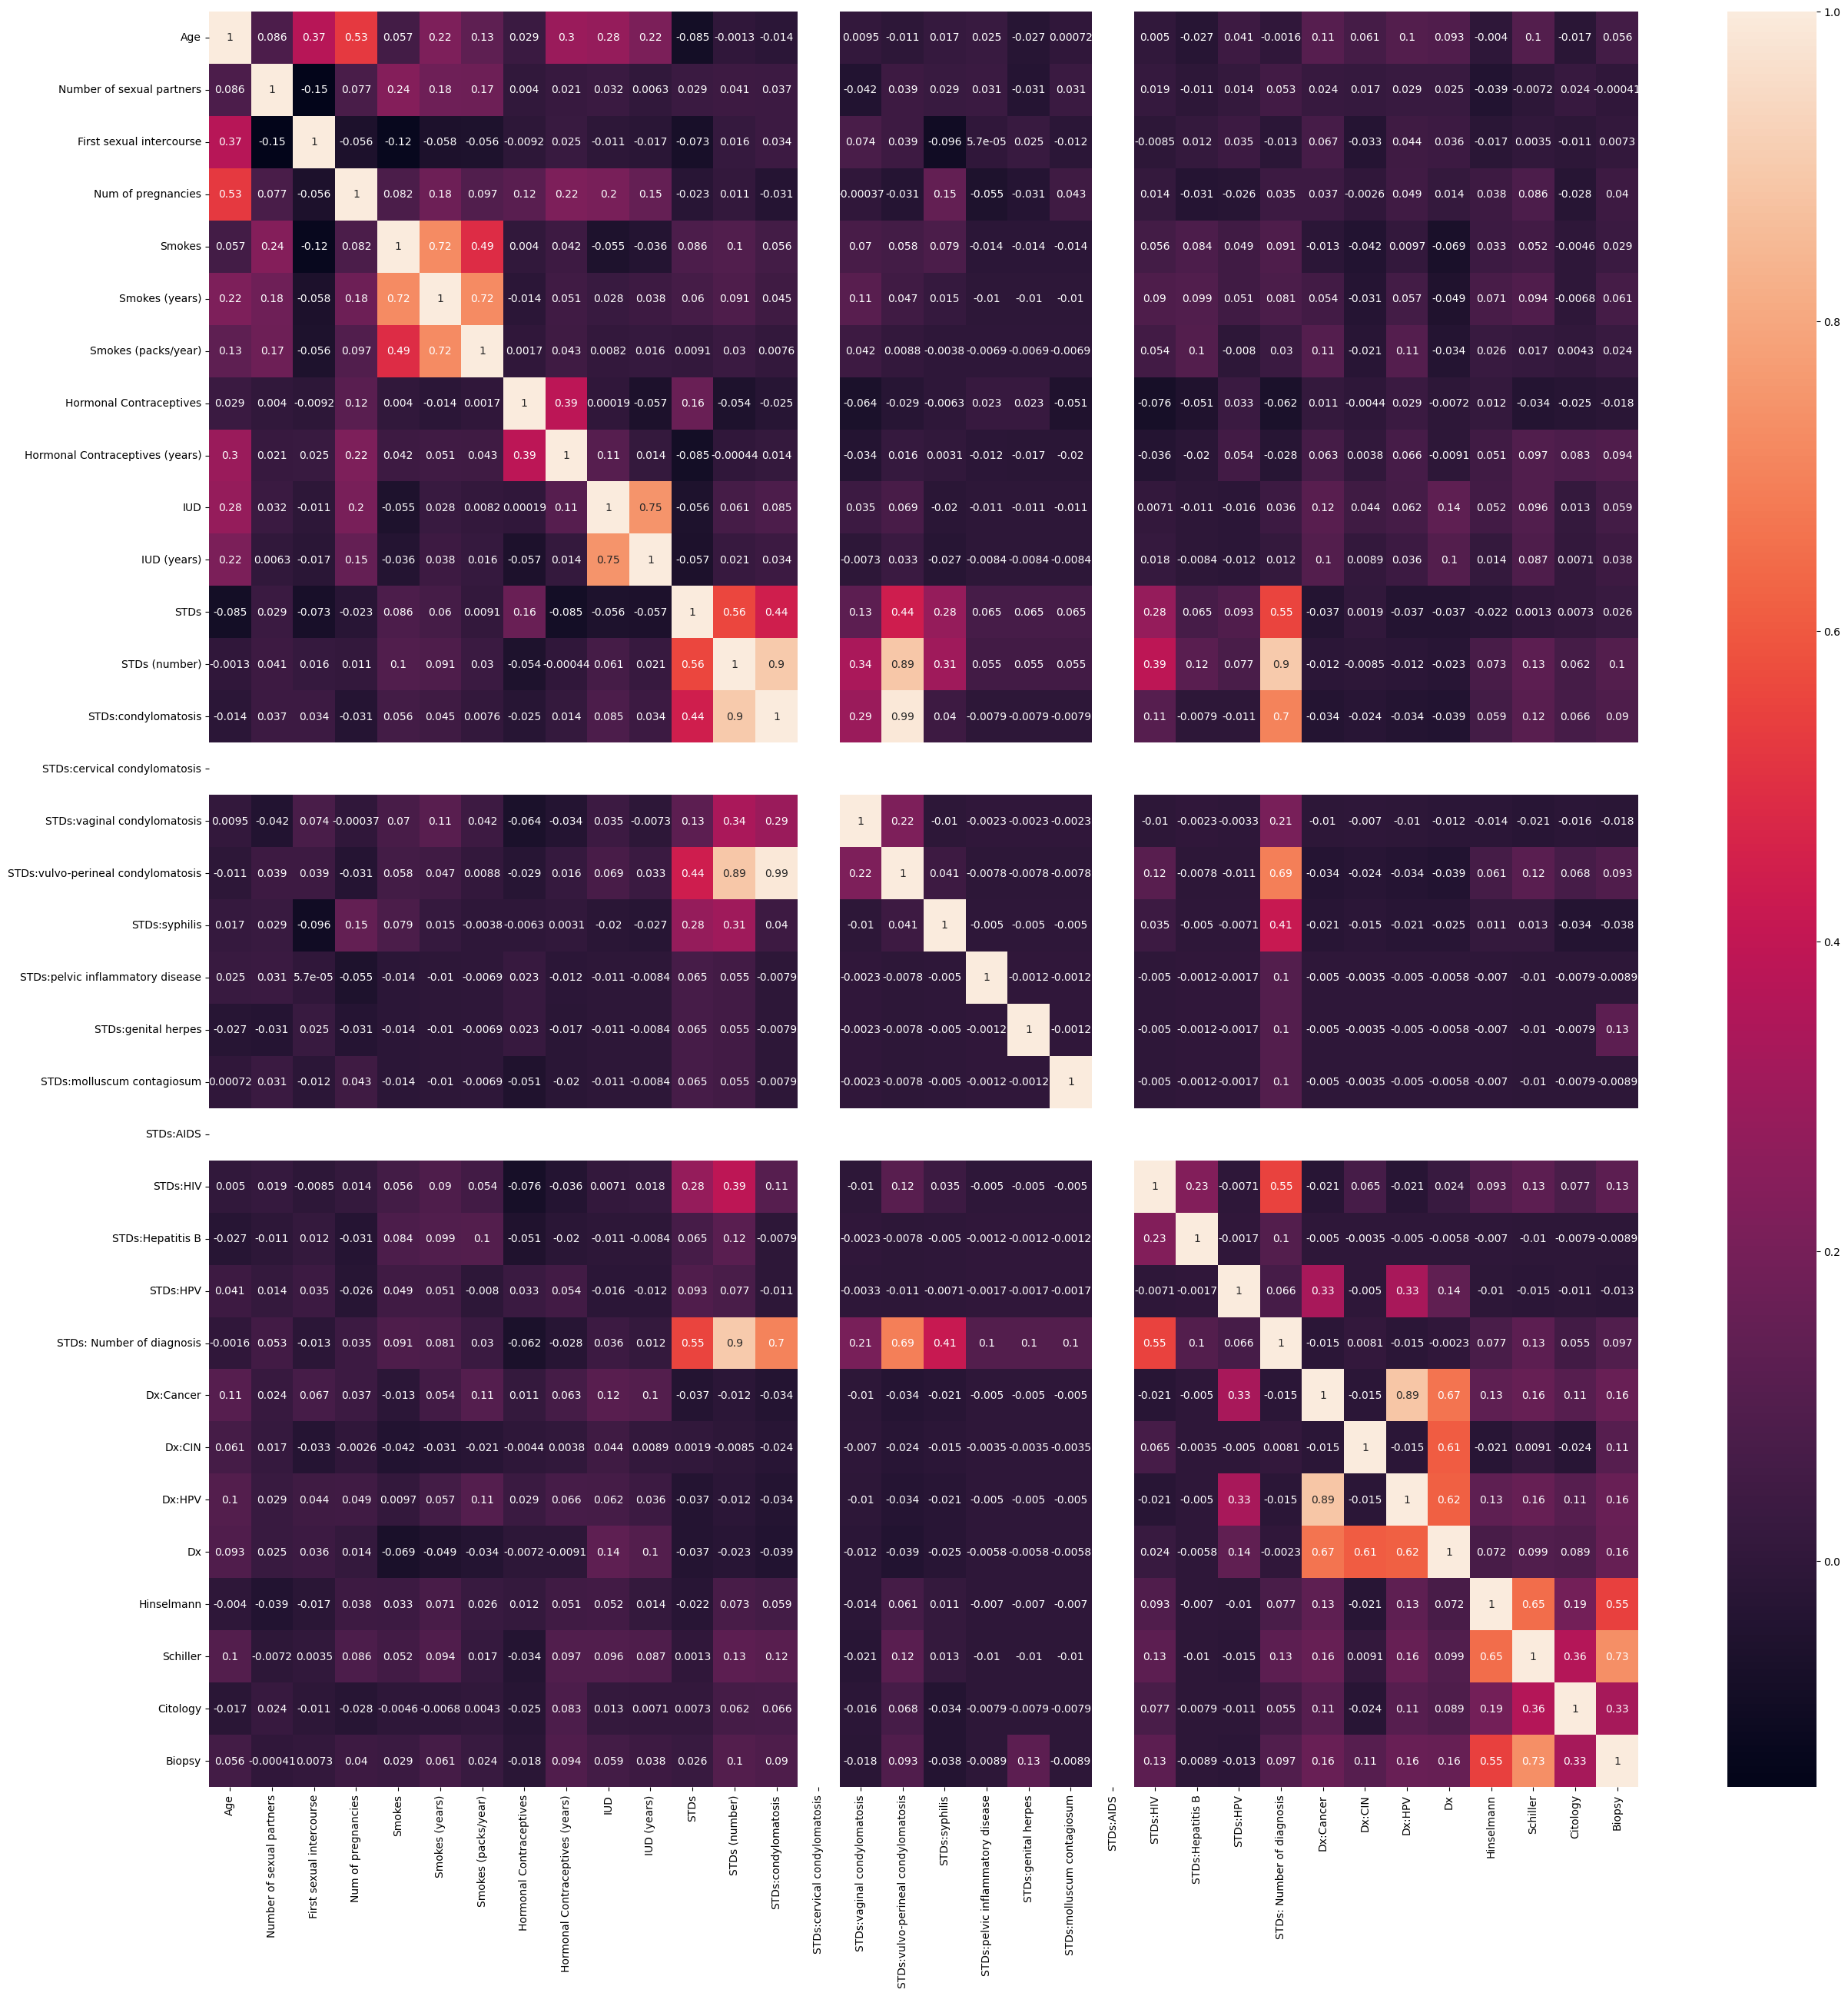

In [15]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr_mat, annot = True)
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (packs/year)'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>]

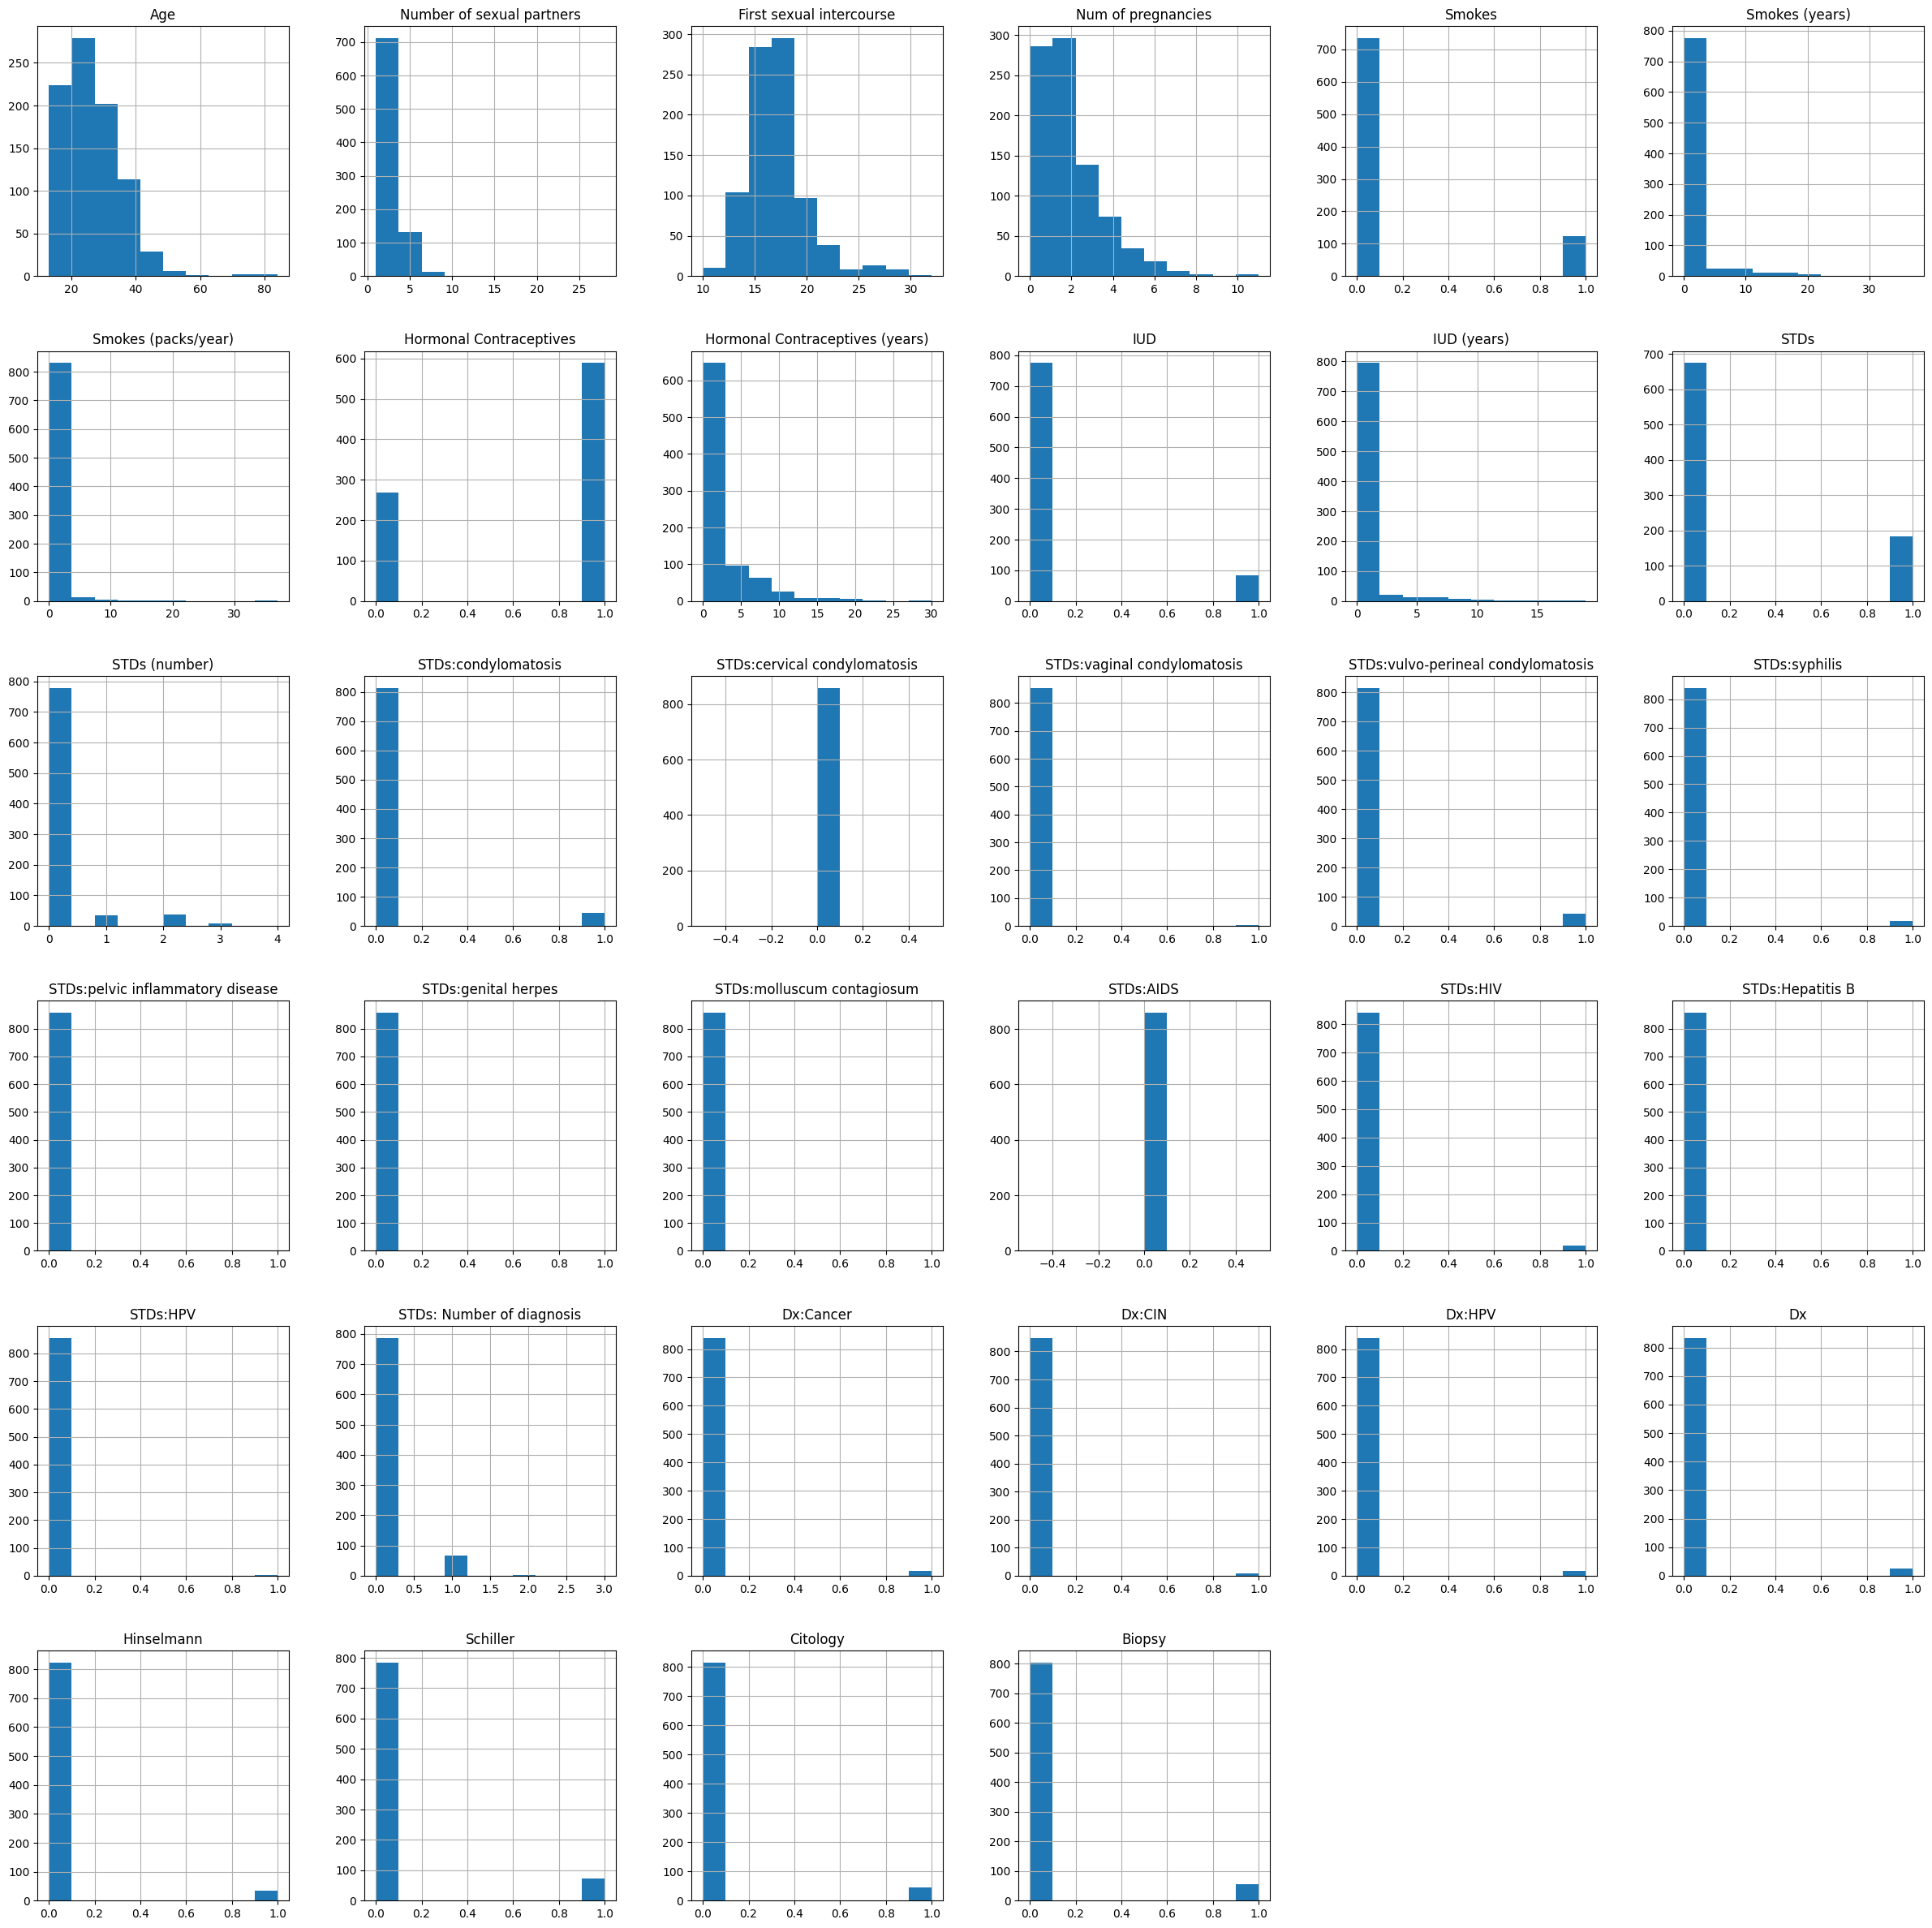

In [16]:
cancer_df.hist(bins = 10, figsize = (30, 30))

In [17]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.216392,0.446278,0.686480,2.035331,0.096737,...,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.057974,2.210351,0.464194,3.567040,0.295771,...,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='STDs (number)', ylabel='count'>

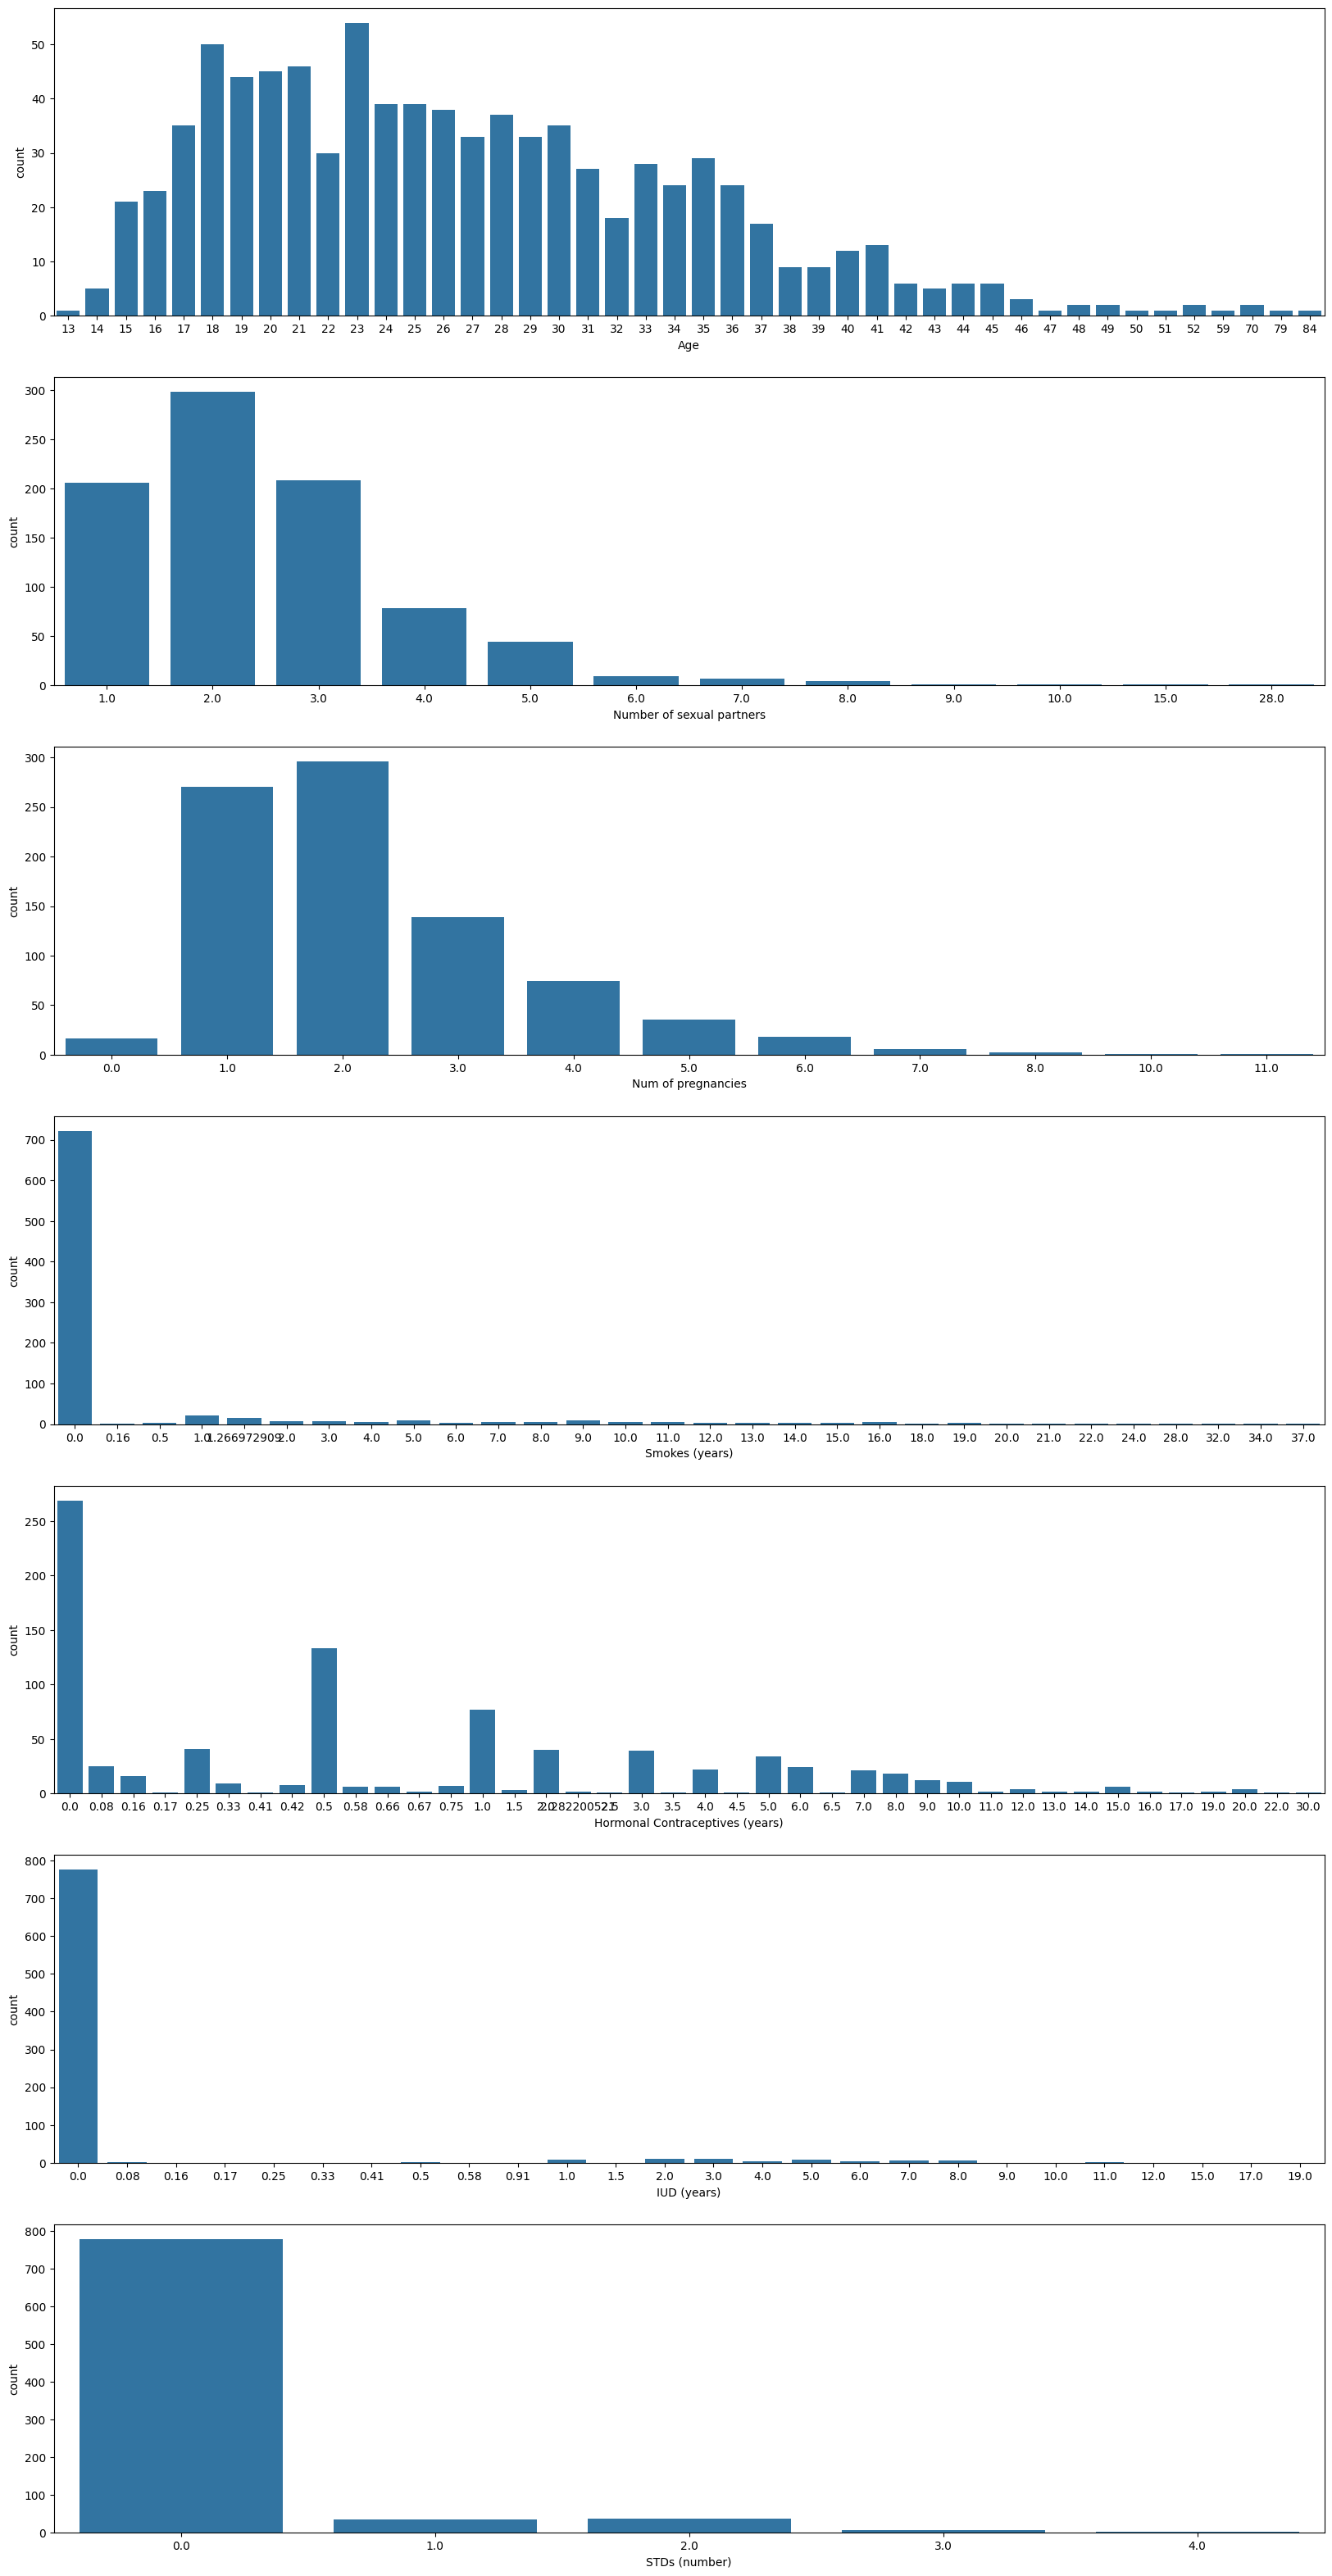

In [18]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, figsize = (20,40))
sns.countplot(x='Age', data=cancer_df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=cancer_df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=cancer_df, ax=ax3)
sns.countplot(x='Smokes (years)', data=cancer_df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=cancer_df, ax=ax5)
sns.countplot(x='IUD (years)', data=cancer_df, ax=ax6)
sns.countplot(x='STDs (number)', data=cancer_df, ax=ax7)

In [19]:
target_df = cancer_df['Biopsy']
input_df = cancer_df.drop(columns = ['Biopsy'])
target_df.shape

(858,)

In [20]:
print(target_df.shape, input_df.shape)

(858,) (858, 33)


In [21]:
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [22]:
input_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.216392,0.446278,0.686480,2.035331,0.096737,...,0.001166,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.057974,2.210351,0.464194,3.567040,0.295771,...,0.034139,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
input_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [24]:
X = input_df.apply(pd.to_numeric, errors='coerce')

y = target_df.apply(pd.to_numeric, errors='coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

# Splitting


In [25]:
from sklearn.model_selection import train_test_split

#for Hinselmann
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
434,20,3.0,17.0,2.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
204,21,1.0,20.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
590,17,2.0,15.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0
584,30,2.0,18.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
838,35,3.0,18.0,3.0,0.0,0.0,0.0,1.0,5.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,34,2.0,17.0,3.0,0.0,0.0,0.0,1.0,0.50,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
106,30,4.0,16.0,2.0,0.0,0.0,0.0,1.0,13.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
270,21,1.0,17.0,1.0,0.0,0.0,0.0,1.0,1.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
435,17,2.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_cols = X.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()

# Scale training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Scale test data using the same scaler
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [27]:

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
458,0.030769,0.037037,0.227273,0.125,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
598,0.046154,0.037037,0.227273,0.125,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
540,0.092308,0.074074,0.272727,0.125,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,0.092308,0.148148,0.318182,0.125,1.0,0.013514,0.013870,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
629,0.153846,0.000000,0.318182,0.375,0.0,0.000000,0.000000,1.0,0.200000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.323077,0.148148,0.227273,0.500,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,0.230769,0.148148,0.318182,0.750,1.0,0.034243,0.035135,1.0,0.016667,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,0.107692,0.037037,0.136364,0.250,0.0,0.000000,0.000000,1.0,0.016667,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
722,0.138462,0.148148,0.227273,0.125,1.0,0.216216,0.108108,1.0,0.266667,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model fitting

In [28]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
model = AdaBoostClassifier()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

cm_adaBoost= confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_adaBoost)

Training accuracy : 0.9657853810264385
Testing accuracy : 0.958139534883721
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       203
           1       0.67      0.50      0.57        12

    accuracy                           0.96       215
   macro avg       0.82      0.74      0.77       215
weighted avg       0.95      0.96      0.96       215

[[200   3]
 [  6   6]]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

cm_log= confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_log)

Training accuracy : 0.9626749611197511
Testing accuracy : 0.9674418604651163
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       203
           1       0.69      0.75      0.72        12

    accuracy                           0.97       215
   macro avg       0.84      0.87      0.85       215
weighted avg       0.97      0.97      0.97       215

[[199   4]
 [  3   9]]


In [32]:
import xgboost as xgb 
model = xgb.XGBClassifier(scale_pos_weight=14, learning_rate = 0.1, max_depth = 5, n_estimators = 10)

model.fit(X_train, y_train)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

cm_xgb = confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_xgb)

Training accuracy : 0.9626749611197511
Testing accuracy : 0.9488372093023256
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       203
           1       0.69      0.75      0.72        12

    accuracy                           0.97       215
   macro avg       0.84      0.87      0.85       215
weighted avg       0.97      0.97      0.97       215

[[199   4]
 [  3   9]]


In [33]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))
cm_randomForest = confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_randomForest)


Training accuracy : 1.0
Testing accuracy : 0.9534883720930233
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       203
           1       0.69      0.75      0.72        12

    accuracy                           0.97       215
   macro avg       0.84      0.87      0.85       215
weighted avg       0.97      0.97      0.97       215

[[199   4]
 [  3   9]]


In [35]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# predicting the test set results
model.fit(X_train, y_train)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))
cm_SVC = confusion_matrix(y_test, y_pred)
# confusion matrix 
print(cm_SVC)

Training accuracy : 0.9704510108864697
Testing accuracy : 0.9534883720930233
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       203
           1       0.69      0.75      0.72        12

    accuracy                           0.97       215
   macro avg       0.84      0.87      0.85       215
weighted avg       0.97      0.97      0.97       215

[[199   4]
 [  3   9]]


In [36]:
import seaborn as sns

<Axes: >

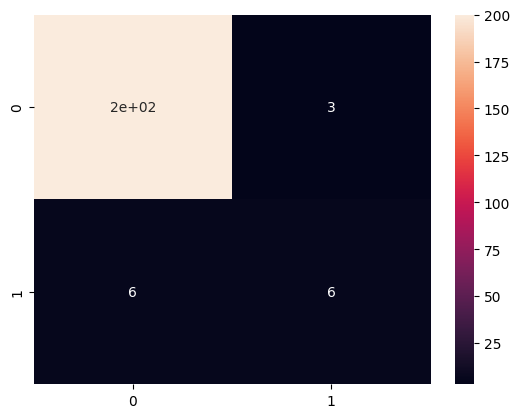

In [44]:
sns.heatmap(cm_adaBoost, annot = True)

<Axes: >

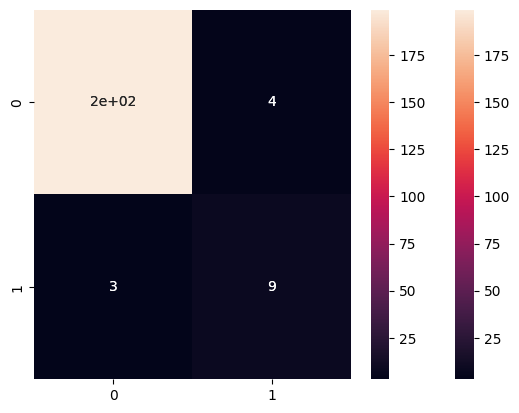

In [42]:
sns.heatmap(cm_log, annot = True)

<Axes: >

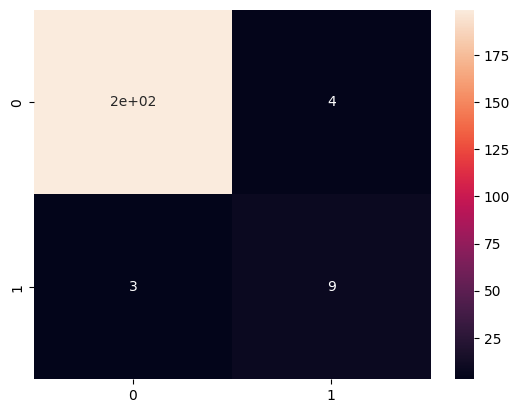

In [45]:
sns.heatmap(cm_xgb, annot = True)

<Axes: >

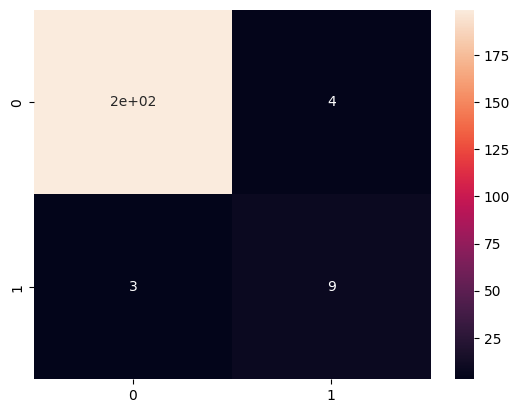

In [46]:
sns.heatmap(cm_randomForest, annot = True)

<Axes: >

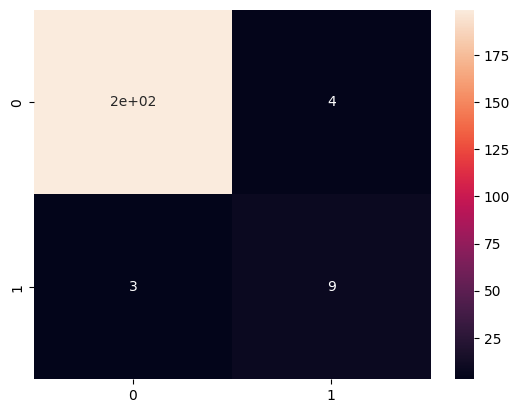

In [47]:
sns.heatmap(cm_SVC, annot = True)